In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import rtree

#make sure python plots are embedded in the notebook
%matplotlib inline 

In [2]:
nta_demo311 = pd.read_csv('ads_final_data/nta_demo311.csv')
nta_demo311.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races.2,Two races including Some other race,"Two races excluding Some other race, and Three or more races",TOTAL HOUSING UNITS,NTA_code
0,0,0,21722467,2011-10-24 08:58:00,2011-10-26 01:45:00,dep,department of environmental protection,noise,noise: construction before/after hours (nm1),NaN,...,1107.0,28.0,7120.0,0.0,111.0,993.0,60.0,933.0,22827.0,MN25
1,20,20,21723669,2011-10-24 14:39:00,2011-10-26 06:45:00,dep,department of environmental protection,noise,noise: construction equipment (nc1),NaN,...,1107.0,28.0,7120.0,0.0,111.0,993.0,60.0,933.0,22827.0,MN25
2,80,81,21727928,2011-10-25 00:28:00,2011-10-26 20:00:00,dep,department of environmental protection,noise,noise: construction equipment (nc1),NaN,...,1107.0,28.0,7120.0,0.0,111.0,993.0,60.0,933.0,22827.0,MN25
3,90,91,21728908,2011-10-25 23:38:00,2011-10-31 20:00:00,dep,department of environmental protection,noise,noise: jack hammering (nc2),NaN,...,1107.0,28.0,7120.0,0.0,111.0,993.0,60.0,933.0,22827.0,MN25
4,116,117,21729998,2011-10-25 23:34:00,2011-11-01 01:45:00,dep,department of environmental protection,noise,noise: jack hammering (nc2),NaN,...,1107.0,28.0,7120.0,0.0,111.0,993.0,60.0,933.0,22827.0,MN25


In [8]:
nta_demo311.complaint_type.unique()

array(['noise', 'noise survey', 'noise - helicopter',
       'noise - residential', 'noise - street/sidewalk',
       'noise - commercial', 'collection truck noise', 'noise - vehicle',
       'noise - park', 'noise - house of worship'], dtype=object)

In [9]:
nta_demo311.descriptor.unique()

array(['noise: construction before/after hours (nm1)',
       'noise: construction equipment (nc1)',
       'noise: jack hammering (nc2)', 'horn honking sign requested (nr9)',
       'people created noise', 'noise: private carting noise (nq1)',
       'noise: other noise sources (use comments) (nzz)',
       'noise: air condition/ventilation equip, residential (nj1)',
       'noise, barking dog (nr5)', 'other', 'noise: alarms (nr3)',
       'noise: air condition/ventilation equip, commercial (nj2)',
       'loud music/party', 'banging/pounding', 'loud talking', 'nypd',
       'noise: boat(engine,music,etc) (nr10)',
       'noise: air condition/ventilation equipment (nv1)',
       '21 collection truck noise', 'noise, ice cream truck (nr4)',
       'noise:  lawn care equipment (ncl)',
       'noise: loud music/nighttime(mark date and time) (np1)',
       'noise: manufacturing noise (nk1)', 'engine idling',
       'car/truck music', 'car/truck horn', 'noise, other animals (nr6)',
       '

In [15]:
len(nta_demo311)

1110530

In [14]:
len(nta_demo311[nta_demo311['NTA_code']=='MN25'])

15338

In [16]:
data = nta_demo311[nta_demo311['NTA_code']=='MN25']

In [34]:
#pd.pivot_table(data,index='descriptor',values='unique_key',aggfunc=len).sort_values(by='unique_key',ascending=False)
list(pd.pivot_table(data,index='descriptor',values='unique_key',aggfunc=len).idxmax())[0]

'noise: construction before/after hours (nm1)'

In [35]:
def main_reason(df,nta_code):
    data = df[df['NTA_code']==nta_code]
    mr = list(pd.pivot_table(data,index='descriptor',values='unique_key',aggfunc=len).idxmax())[0]
    return mr

In [38]:
len(nta_demo311['NTA_code'].unique())

191

In [43]:
nta_code_list = nta_demo311['NTA_code'].unique()
nta_mr = []

for i in nta_code_list:
    nta_mr.append(main_reason(nta_demo311,i))

In [44]:
nta_mr_df = pd.DataFrame(list(zip(nta_code_list, nta_mr)), columns = ['NTA_code', 'main_reason'])
nta_mr_df.head()

,NTA_code,main_reason
0,MN25,noise: construction before/after hours (nm1)
1,MN32,noise: construction before/after hours (nm1)
2,MN11,loud music/party
3,MN13,noise: construction before/after hours (nm1)
4,BK88,loud music/party


In [47]:
#read shapefiles of NYC NTA
nta=gpd.read_file('ads_final_data/Neighborhood_Tabulation_Areas/geo_export_ed718acf-b0e6-41cf-ac5d-a027f7d41063.shp')
nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820..."


In [48]:
nta_withmr = nta.merge(nta_mr_df,left_on='ntacode',right_on='NTA_code')
nta_withmr.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,NTA_code,main_reason
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228074,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88,loud music/party
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",QN51,loud music/party
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711538,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",QN27,loud music/party
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335837,"POLYGON ((-73.75726 40.71814, -73.75589 40.716...",QN07,loud music/party
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.686548,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",MN06,loud music/party


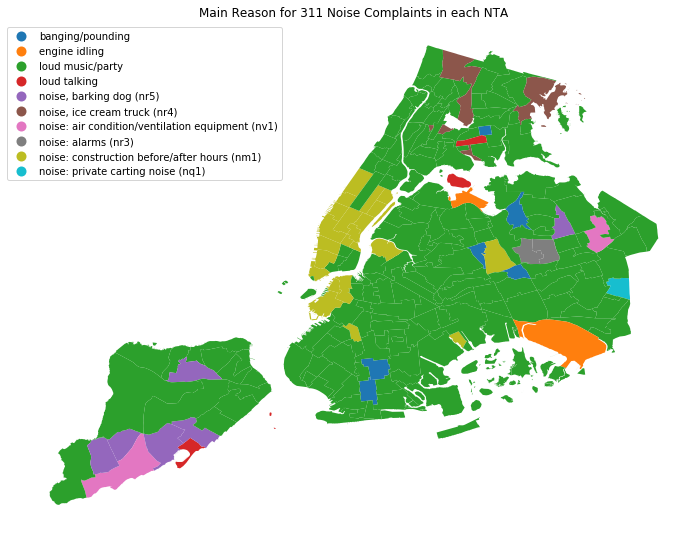

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
nta_withmr.plot(column='main_reason',categorical=True,legend=True,ax=ax)
ax.set(title='Main Reason for 311 Noise Complaints in each NTA')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.4,1))
ax.set_axis_off()

plt.show()